![image.png](https://i.imgur.com/a3uAqnb.png)

In [2]:
from IPython.display import clear_output

!pip install dask[dataframe] catboost

clear_output()

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [4]:
!wget --no-check-certificate "https://drive.google.com/uc?export=download&id=14vF-A2sCDi9MzG9h_s3VA8BH7s6AhfQW" -O ford.csv
clear_output()

In [5]:
df = pd.read_csv("/content/ford.csv")

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


**1. Exploratory Data Analysis (EDA)**

   You may:

	•	Check the data structure (.head(), .info(), .shape()).
	•	Check for missing values in each column.
	•	Get summary statistics.
	•	Distribution of the target variable (Price): like Histogram of car prices.
	•	Boxplot to detect outliers.
	•	Categorical features:
	•	Countplots (e.g., number of cars by model, transmission, fuelType).
	•	Numerical features:
	•	Histograms for features like mileage, engineSize, year.
	•	Correlation analysis:
	•	Heatmap of numerical features vs. Price.
	•	Scatterplots (e.g., engineSize vs. Price, mileage vs. Price).

In [7]:
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8,5)

In [8]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [10]:
print("Shape of dataset: ", df.shape)

Shape of dataset:  (17966, 9)


In [11]:
print("Missing values:\n")
df.isnull().sum()

Missing values:



,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [12]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


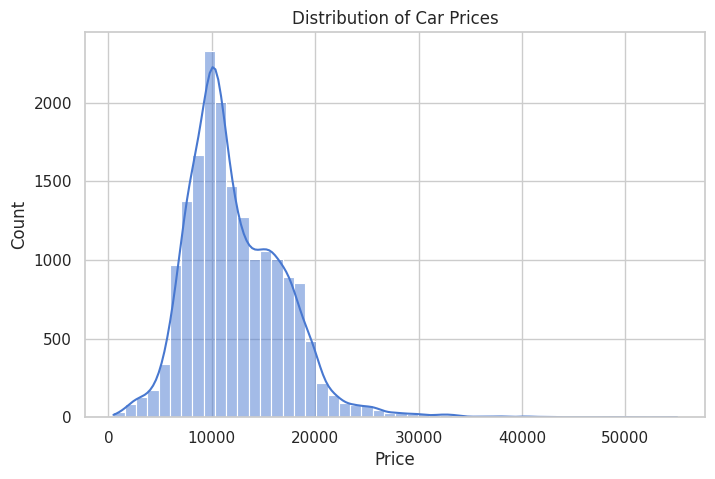

In [13]:
# Distribution of target variable (Price)

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

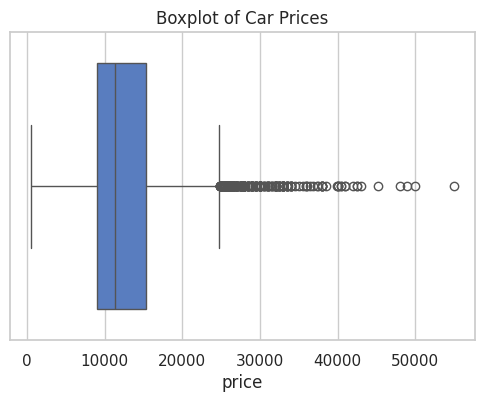

In [14]:
#Boxplot for outliers in Price

plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Prices")
plt.show()

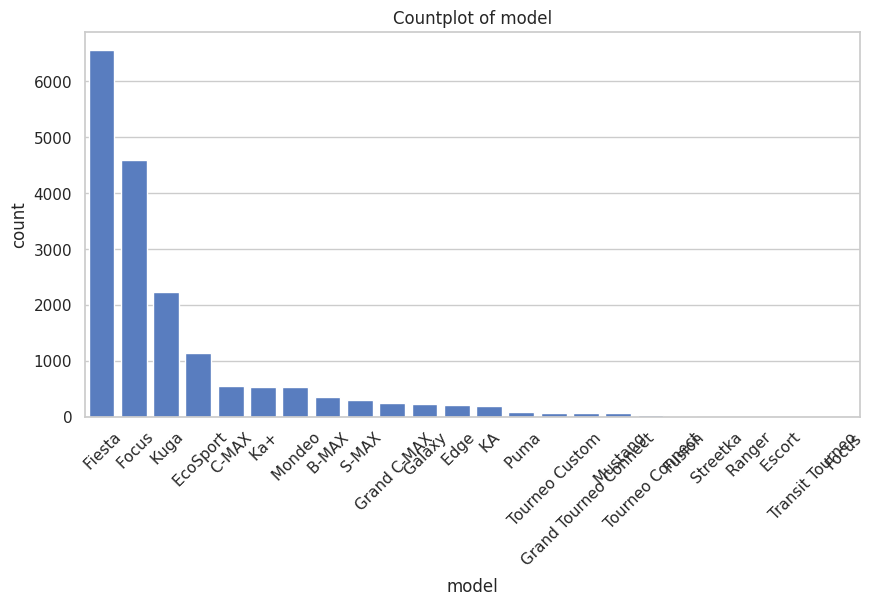

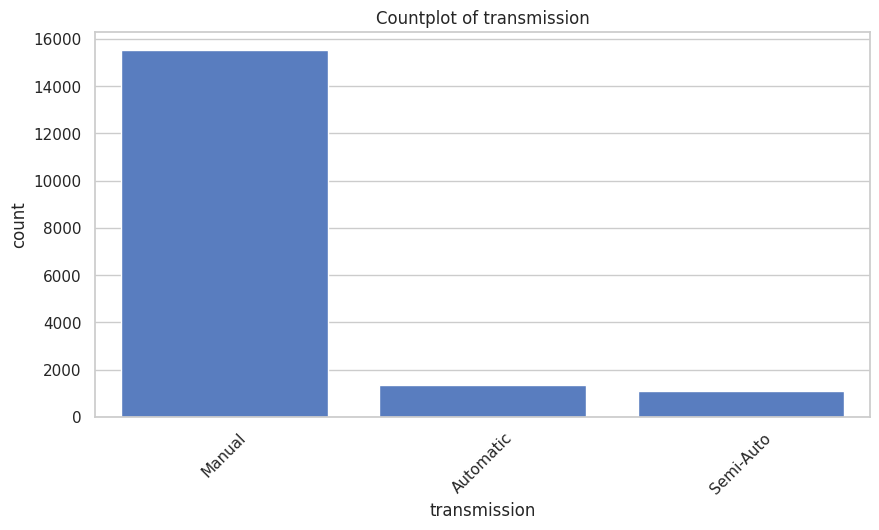

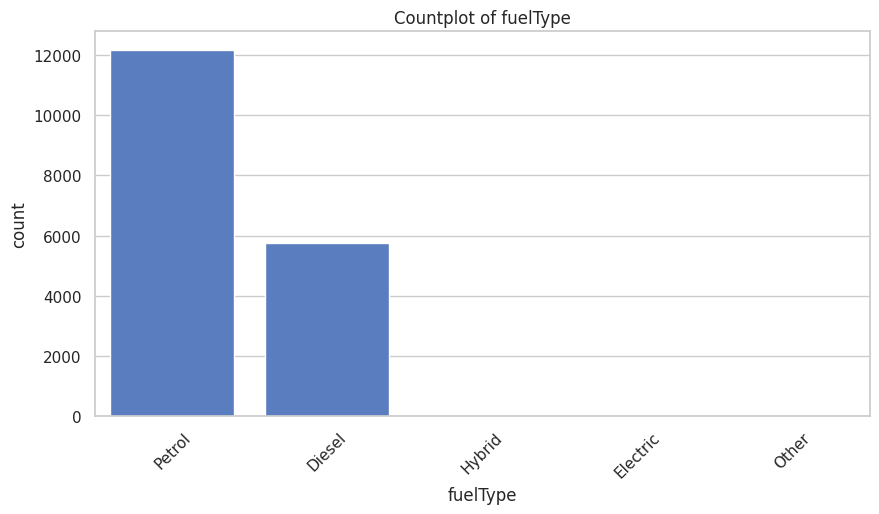

In [15]:
# Categorical features countplots

cat_features = ['model','transmission','fuelType']
for col in cat_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

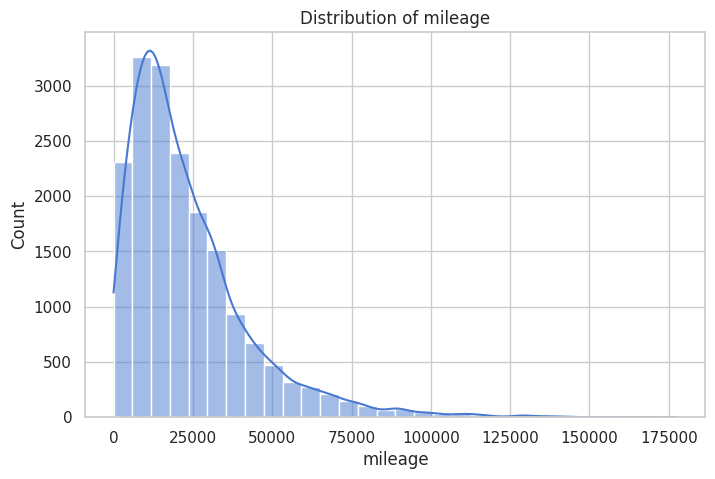

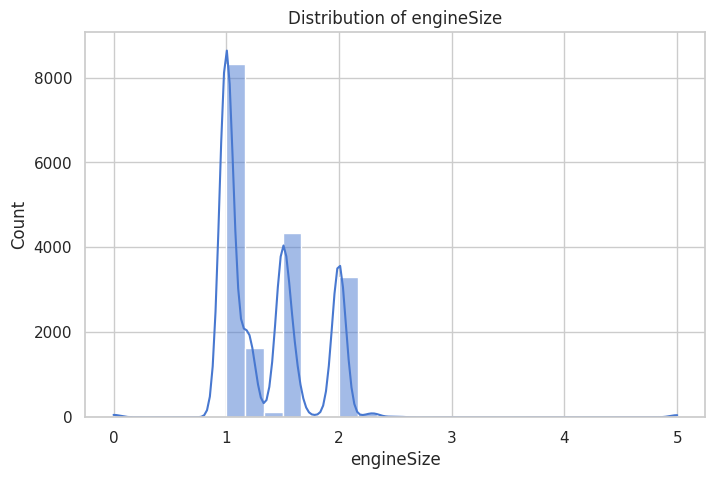

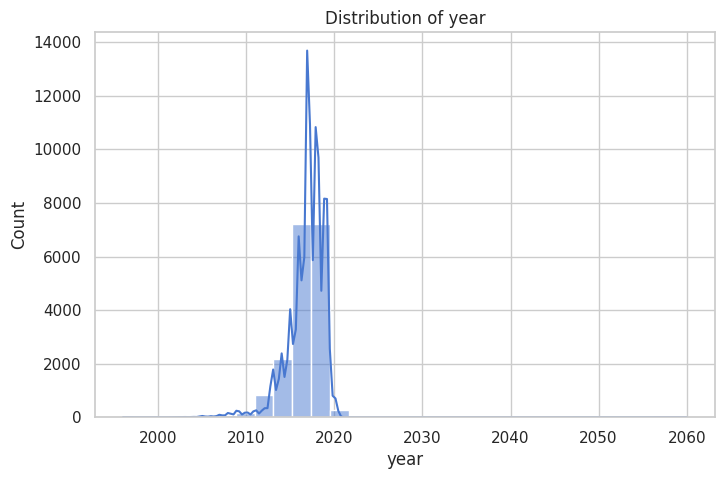

In [16]:
# Numerical features histograms

num_features = ['mileage','engineSize','year']
for col in num_features:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

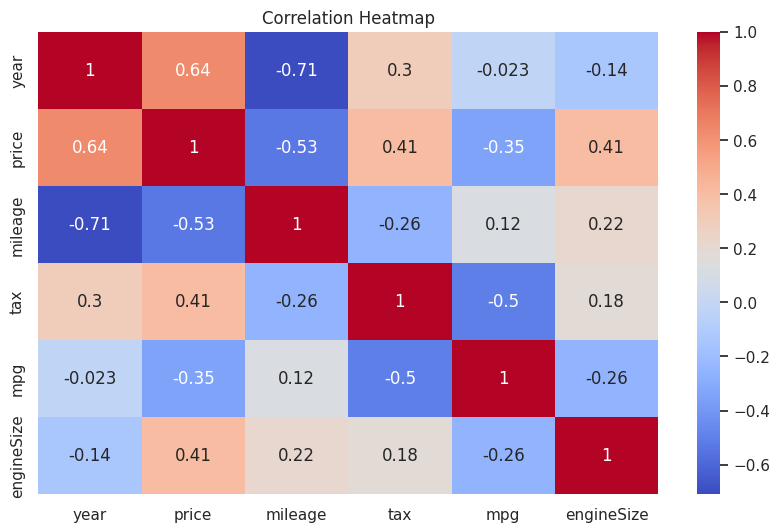

In [17]:
# Correlation analysis

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


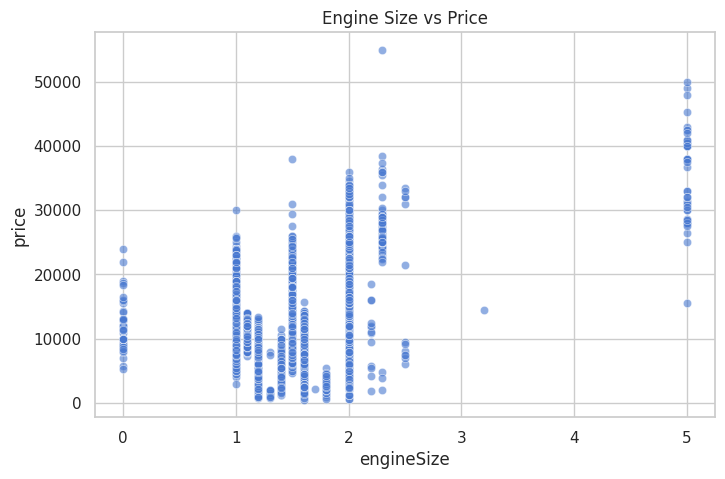

In [18]:
# Scatterplots with Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='engineSize', y='price', data=df, alpha=0.6)
plt.title("Engine Size vs Price")
plt.show()

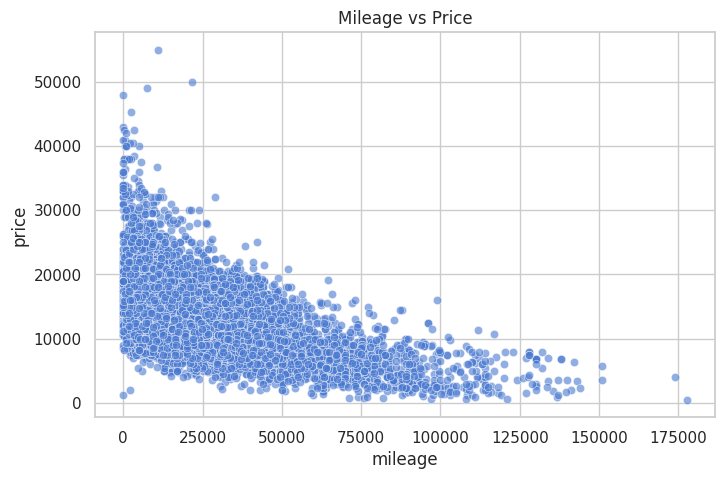

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mileage', y='price', data=df, alpha=0.6)
plt.title("Mileage vs Price")
plt.show()

**2. Data Preprocessing**

	•	Handle missing values (impute with median/mean for numeric, mode for categorical, or drop if necessary).
	•	Handle duplicates.
	•	Label encoding / One-hot encoding for categorical variables.
	•	Feature engineering:
	•	For example create an “age” feature = current_year - year.
	•	Drop original year if not needed.
	•	Consider mileage per year ratio.
	•	Scaling:
	•	Apply MinMaxScaler or StandardScaler to numerical features.

In [20]:
# Handle Missing Values, Note: This dataset is clean, so the following examples are just show you how to handle it
# Numeric → fill with median

num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical → fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


print("Missing values after imputation:\n")
df.isnull().sum()

Missing values after imputation:



,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [21]:
# Handle Duplicates

print("Shape before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)


Shape before removing duplicates: (17966, 9)
Shape after removing duplicates: (17812, 9)


In [22]:
# Encoding Categorical Variables

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [23]:
# Feature Engineering
current_year = 2025
df['age'] = current_year - df['year']

In [24]:
df.drop('year', axis=1, inplace=True)

In [25]:
# Mileage per year (avoid divide by zero)
df['mileage_per_year'] = df['mileage'] / (df['age'].replace(0, 1))

In [26]:
# Scaling Numerical Features
scaler = StandardScaler()

In [27]:
# Identify numeric features again after encoding
num_features = df.select_dtypes(include=['int64','float64']).columns.drop('price')

df[num_features] = scaler.fit_transform(df[num_features])

print("Final dataset shape:", df.shape)
df.head()

Final dataset shape: (17812, 36)


,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,age,mileage_per_year
0,12000,-0.382994,0.591380,-0.020597,-0.810561,False,False,False,False,True,...,False,False,False,False,False,False,False,True,-0.067059,-0.374836
1,14000,-0.736317,0.591380,-0.020597,-0.810561,False,False,False,False,False,...,False,False,True,False,False,False,False,True,-0.554393,-0.767942
2,13000,-0.562616,0.591380,-0.020597,-0.810561,False,False,False,False,False,...,False,False,True,False,False,False,False,True,-0.067059,-0.621294
3,17500,-0.665405,0.510777,-1.737858,0.345325,False,False,False,False,True,...,False,False,True,False,False,False,False,True,-1.041726,-0.515965
4,16500,-1.127749,0.510777,-0.908836,-0.810561,False,False,False,False,True,...,False,False,False,False,False,False,False,True,-1.041726,-1.361799


**3. Model Building (Regression)**

	•	Split data into training and testing sets (e.g., 80/20).
	•	Train a regression models.
	•	Predict car prices on the test set.


In [28]:
# Prepare features and target

X = df.drop("price", axis=1)
y = df["price"]

In [29]:
# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Define models

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10, positive=True, max_iter=10000),
    "LASSO Regression": Lasso(alpha=100, positive=True, max_iter=10000),
    "Support Vector Machine": SVR(kernel='linear'),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "LightGBM": LGBMRegressor(verbose=-1, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

In [31]:
# Train, Predict & Evaluate

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append([name, mae, rmse, r2])

**4. Model Evaluation**

	•	Evaluate using regression metrics:
	•	RMSE (Root Mean Squared Error)
	•	MAE (Mean Absolute Error)
	•	Also check R^2 score.

In [32]:
# Show results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
results_df

,Model,MAE,RMSE,R²
0,Linear Regression,1297.552540,2259.858578,0.772245
1,Ridge Regression,2504.667250,3399.106455,0.484730
2,LASSO Regression,2900.947959,3898.768218,0.322109
3,Support Vector Machine,1704.705275,2529.289300,0.714700
4,Decision Tree Regressor,1533.534974,2096.956152,0.803897
5,Random Forest Regressor,895.780057,1311.512358,0.923290
6,LightGBM,831.588868,1204.789071,0.935267
7,CatBoost,805.996657,1168.371633,0.939121


In [33]:
# Sort the models results by RMSE (lower is better)
print("\nSorted by RMSE:")
print(results_df.sort_values(by="RMSE"))


Sorted by RMSE:
                     Model          MAE         RMSE        R²
7                 CatBoost   805.996657  1168.371633  0.939121
6                 LightGBM   831.588868  1204.789071  0.935267
5  Random Forest Regressor   895.780057  1311.512358  0.923290
4  Decision Tree Regressor  1533.534974  2096.956152  0.803897
0        Linear Regression  1297.552540  2259.858578  0.772245
3   Support Vector Machine  1704.705275  2529.289300  0.714700
1         Ridge Regression  2504.667250  3399.106455  0.484730
2         LASSO Regression  2900.947959  3898.768218  0.322109
